## House Price Predicion 

kaggle dataset link:
    https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data
    
    What are the things that a potential home buyer considers before purchasing a house? The location, the size of the property, vicinity to offices, schools, parks, restaurants, hospitals or the stereotypical white picket fence? What about the most important factor — the price?

data descptn:
the price are in lakhs!!
size is the no of BKHs

In [1]:
import numpy as np
import pandas as pd
import warnings


warnings.filterwarnings('ignore')



df=pd.read_csv('Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [3]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

# Feature Engineering


In [4]:
df=df.rename(columns={'area_type':'Area Type'})
df['Area Type'].value_counts()

Area Type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

no null values in the Area Type

In [5]:
df['availability'].value_counts()


availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64

In [6]:
# use the `str` with a regular expression to replace non-alphabetic characters
df['availability'] = df['availability'].apply(lambda x:x[3:])
df['availability'] = df['availability'].str.replace('dy To Move', 'Ready To Move')

df['availability'].value_counts()

availability
Ready To Move        10581
Dec                    728
May                    338
Apr                    298
Aug                    249
Mar                    246
Jul                    206
Jun                    200
Jan                    126
Oct                     91
Sep                     87
Nov                     79
Feb                     75
ediate Possession       16
Name: count, dtype: int64

In [7]:
d=df['location'].value_counts().to_dict()

In [8]:
df['location']=df['location'].str.replace('Road','')
df['location']=df['location'].str.replace('th Phase','')
df['location']=df['location'].str.replace('1','')
df['location']=df['location'].str.replace('2','')
df['location']=df['location'].str.replace('8','')
df['location']=df['location'].str.replace('7','')
df['location']=df['location'].str.replace('9','')
df['location']=df['location'].str.replace('5','')
df['location']=df['location'].str.replace('6','')
df['location']=df['location'].str.replace('4','')
df['location']=df['location'].str.replace('3','')
df['location']=df['location'].str.replace(' ','')
df['location']=df['location'].str.replace('II','')
df['location']=df['location'].str.replace('ElectronicsCity','ElectronicCity')
df['location']=df['location'].str.replace('mainroad','')

df['location']=df['location'].str.replace('Main','')
df['location']=df['location'].str.replace('BAGUR','Begur')
df['location']=df['location'].str.replace('ROAD','')

df['location']=df['location'].str.replace('Bellandur','Marathahalli')

df['location']=df['location'].str.replace('KRPuram','Sarjapur')
df['location']=df['location'].str.replace('Hoodi','Sarjapur')
df['location']=df['location'].str.replace('ROAD','')
df['location']=df['location'].str.replace('Phase','')

In [9]:

df

,Area Type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Dec,ElectronicCity,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,ChikkaTirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,RichardsTown,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,RajaRajeshwariNagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [10]:
d=df['location'].value_counts().to_dict()
d

{'Sarjapur': 660,
 'Whitefield': 541,
 'ElectronicCity': 525,
 'JPNagar': 387,
 'Kanakpura': 273,
 'Marathahalli': 271,
 'Thanisandra': 241,
 'Yelahanka': 213,
 'Hennur': 207,
 'Uttarahalli': 186,
 'Hebbal': 177,
 'RajaRajeshwariNagar': 171,
 'Bannerghatta': 170,
 'Haralur': 142,
 'RajajiNagar': 107,
 'Begur': 102,
 'Chandapura': 100,
 'Yeshwanthpur': 85,
 'Varthur': 85,
 'Kasavanhalli': 81,
 'Harlur': 79,
 'Banashankari': 75,
 'Hormavu': 74,
 'RamamurthyNagar': 74,
 'Kengeri': 73,
 'Hosa': 72,
 'Koramangala': 72,
 'Jakkur': 71,
 'OldMadras': 71,
 'Kothanur': 66,
 'Kaggadasapura': 64,
 'Nagarbhavi': 63,
 'Thigalarapalya': 62,
 'AkshayaNagar': 62,
 'TCPalaya': 60,
 'Rachenahalli': 58,
 'Malleshwaram': 58,
 'Budigere': 54,
 'Jigani': 54,
 'HSRLayout': 53,
 'Jalahalli': 52,
 'Hulimavu': 52,
 'Panathur': 51,
 'Bisuvanahalli': 51,
 'Bhoganhalli': 50,
 'Mysore': 50,
 'Ramagondanahalli': 50,
 'HegdeNagar': 49,
 'Gottigere': 48,
 'Devanahalli': 47,
 'Kundalahalli': 47,
 'Hosur': 47,
 'Brookefi

In [11]:
df.isnull().sum()

Area Type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [12]:
# get the top 15 most frequent values in the 'location' column
top_values = df['location'].value_counts().head(15).index.tolist()

# replace all values not in the top 15 with 'Whitefield'
df['location'][:2000] = df['location'][:2000].where(df['location'].isin(top_values), 'Whitefield')
df['location'][2000:5000] = df['location'][2000:5000].where(df['location'].isin(top_values), 'Sarjapur')

In [13]:
d=df['location'].value_counts().to_dict()
d

{'Sarjapur': 2729,
 'Whitefield': 1909,
 'ElectronicCity': 525,
 'JPNagar': 387,
 'Kanakpura': 273,
 'Marathahalli': 271,
 'Thanisandra': 241,
 'Yelahanka': 213,
 'Hennur': 207,
 'Uttarahalli': 186,
 'Hebbal': 177,
 'RajaRajeshwariNagar': 171,
 'Bannerghatta': 170,
 'Haralur': 142,
 'RajajiNagar': 107,
 'Chandapura': 60,
 'Begur': 56,
 'Hormavu': 55,
 'Varthur': 54,
 'OldMadras': 53,
 'Yeshwanthpur': 51,
 'Kasavanhalli': 48,
 'Banashankari': 48,
 'Jakkur': 45,
 'Harlur': 45,
 'Hosa': 44,
 'Kothanur': 44,
 'Kengeri': 42,
 'Koramangala': 41,
 'Kaggadasapura': 40,
 'Thigalarapalya': 39,
 'Nagarbhavi': 39,
 'RamamurthyNagar': 39,
 'Jalahalli': 37,
 'Budigere': 36,
 'AkshayaNagar': 35,
 'TCPalaya': 35,
 'Bhoganhalli': 35,
 'Kundalahalli': 34,
 'Malleshwaram': 34,
 'HSRLayout': 34,
 'Ramagondanahalli': 33,
 'Brookefield': 33,
 'CVRamanNagar': 32,
 'Rachenahalli': 32,
 'Panathur': 32,
 'HegdeNagar': 31,
 'Hosur': 31,
 'Vidyaranyapura': 31,
 'Jigani': 31,
 'Hulimavu': 30,
 'Balagere': 30,
 'My

In [14]:

# get the top 15 most frequent values in the 'location' column
top_values = df['location'].value_counts().head(15).index.tolist()

# replace all values not in the top n with 'Whitefield'
df['location'] = df['location'].where(df['location'].isin(top_values), 'NaN')





In [15]:
d=df['location'].value_counts().to_dict()
d

{'NaN': 5612,
 'Sarjapur': 2729,
 'Whitefield': 1909,
 'ElectronicCity': 525,
 'JPNagar': 387,
 'Kanakpura': 273,
 'Marathahalli': 271,
 'Thanisandra': 241,
 'Yelahanka': 213,
 'Hennur': 207,
 'Uttarahalli': 186,
 'Hebbal': 177,
 'RajaRajeshwariNagar': 171,
 'Bannerghatta': 170,
 'Haralur': 142,
 'RajajiNagar': 107}

In [16]:
replacement_values = [i for i in df['location'].value_counts().index]
replacement_values

['NaN',
 'Sarjapur',
 'Whitefield',
 'ElectronicCity',
 'JPNagar',
 'Kanakpura',
 'Marathahalli',
 'Thanisandra',
 'Yelahanka',
 'Hennur',
 'Uttarahalli',
 'Hebbal',
 'RajaRajeshwariNagar',
 'Bannerghatta',
 'Haralur',
 'RajajiNagar']

In [17]:
# split the 'location' column into 15 parts
df_parts = np.array_split(df['location'],15 )

In [18]:
#replacing the Nan values with the top 15 values ... ig it works!!

for i in range(1,15):
    df_parts[i-1]=df_parts[i-1].str.replace('NaN',replacement_values[i])


In [19]:
df['locate'] = pd.DataFrame(np.concatenate(df_parts), columns=['location'])

df['locate'].value_counts()

locate
Sarjapur               2729
Whitefield             1909
Yelahanka               832
Thanisandra             811
Hennur                  805
Uttarahalli             796
Hebbal                  778
RajaRajeshwariNagar     774
Haralur                 752
Bannerghatta            751
NaN                     593
ElectronicCity          525
Marathahalli            498
JPNagar                 387
Kanakpura               273
RajajiNagar             107
Name: count, dtype: int64

In [20]:
df['locate']=df['locate'].str.replace('Nan','ElectronicCity')

In [21]:
df.isnull().sum()

Area Type          0
availability       0
location           0
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
locate             0
dtype: int64

In [22]:
df=df.drop('location',axis=1)
df=df.drop('society',axis=1)

In [23]:
df['size'].value_counts()


size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [24]:
df['size']=df['size'].str.replace('BHK','')
df['size']=df['size'].str.replace('Bedroom','')
df['size']=df['size'].str.replace('RK','')
df['size']=df['size'].fillna('2')
df['size']=df['size'].astype(float)

In [25]:
df['bath'].value_counts()
df['bath']=df['bath'].fillna('2')
df['bath']=df['bath'].astype(int)

In [26]:
df['balcony']=df['balcony'].fillna('0')
df['balcony']=df['balcony'].astype(float)

In [27]:
d=df['total_sqft'].value_counts()

In [28]:
df['total_sqft']=df['total_sqft'].apply(lambda x:x[:5])


# filter out rows with non-numeric values in total_sqft
df = df[df['total_sqft'].str.isnumeric()]

df['total_sqft']=df['total_sqft'].astype(float)


# EDA

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12986 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Type     12986 non-null  object 
 1   availability  12986 non-null  object 
 2   size          12986 non-null  float64
 3   total_sqft    12986 non-null  float64
 4   bath          12986 non-null  int32  
 5   balcony       12986 non-null  float64
 6   price         12986 non-null  float64
 7   locate        12986 non-null  object 
dtypes: float64(4), int32(1), object(3)
memory usage: 862.4+ KB


<Axes: xlabel='count', ylabel='Area Type'>

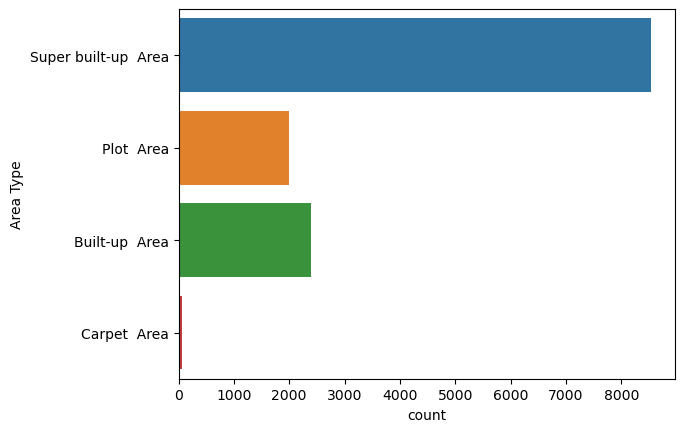

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y='Area Type',data=df)

<Figure size 900x2900 with 0 Axes>

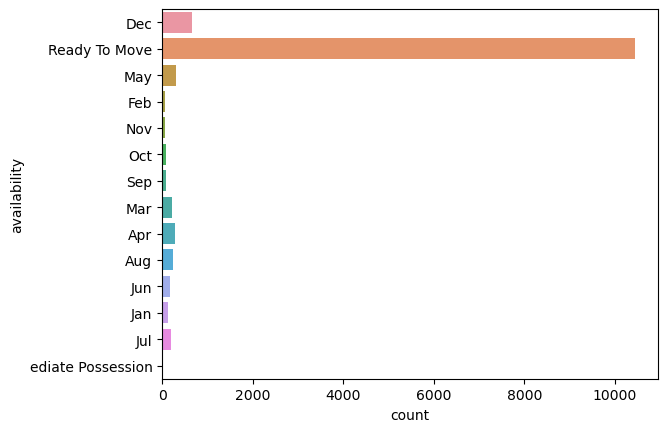

<Figure size 900x2900 with 0 Axes>

In [31]:
sns.countplot(y='availability',data=df)
plt.figure(figsize=(9,29))

<Axes: ylabel='Density'>

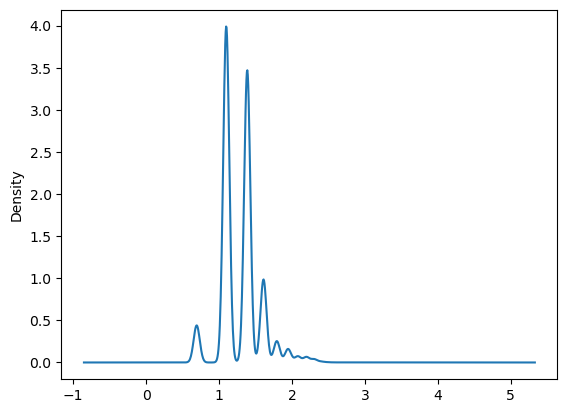

In [32]:
siz=df['size'].apply(lambda x:np.log(x+1))
siz.plot(kind='kde')

In [33]:
print('the minimum size in BHK',df['size'].min())
print('the maximum size in BHK',df['size'].max())
print('the average size in BHK',df['size'].median(),' - ',df['size'].mean())

the minimum size in BHK 1.0
the maximum size in BHK 43.0
the average size in BHK 3.0  -  2.804173725550593


<Axes: ylabel='Density'>

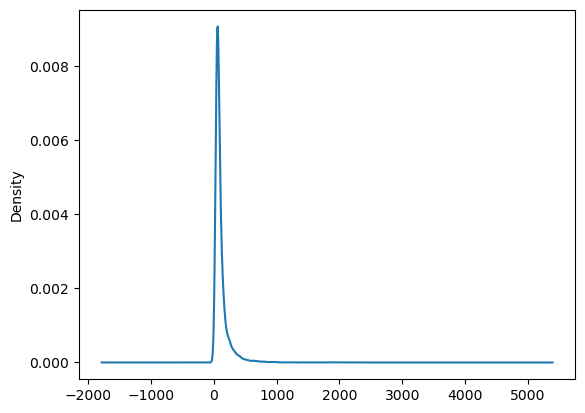

In [34]:
df['price'].plot(kind='kde')


In [35]:
print('the minimum price in lakhs',df['price'].min())
print('the maximum price in lakhs',df['price'].max())
print('the average price in lakhs',df['price'].median(),' - ',df['price'].mean())

the minimum price in lakhs 8.0
the maximum price in lakhs 3600.0
the average price in lakhs 71.525  -  112.27140458955799


<Axes: >

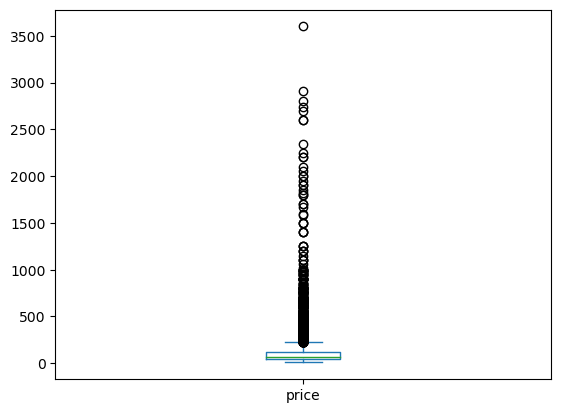

In [36]:
df['price'].plot(kind='box')

## Bi-Variate Analysis

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12986 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Type     12986 non-null  object 
 1   availability  12986 non-null  object 
 2   size          12986 non-null  float64
 3   total_sqft    12986 non-null  float64
 4   bath          12986 non-null  int32  
 5   balcony       12986 non-null  float64
 6   price         12986 non-null  float64
 7   locate        12986 non-null  object 
dtypes: float64(4), int32(1), object(3)
memory usage: 862.4+ KB


<Axes: xlabel='Area Type', ylabel='price'>

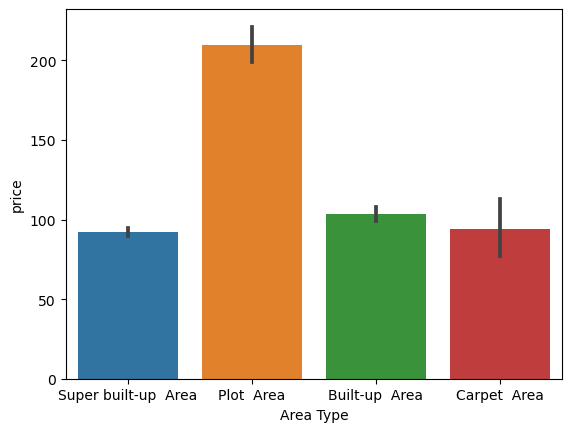

In [38]:
sns.barplot(x='Area Type',y='price',data=df)

<Axes: xlabel='price', ylabel='locate'>

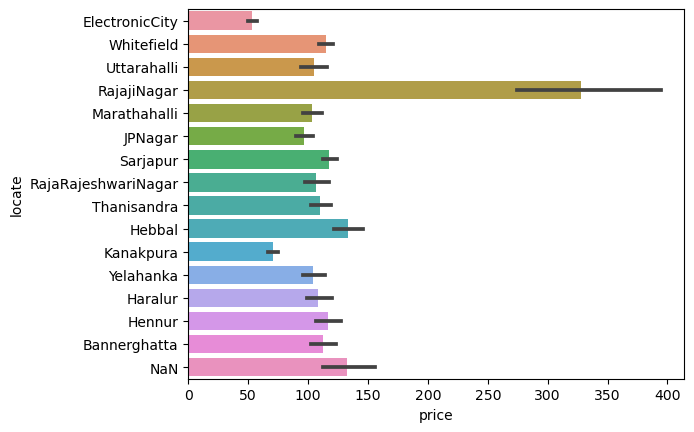

In [39]:
sns.barplot(y='locate',x='price',data=df)

<Axes: xlabel='price', ylabel='size'>

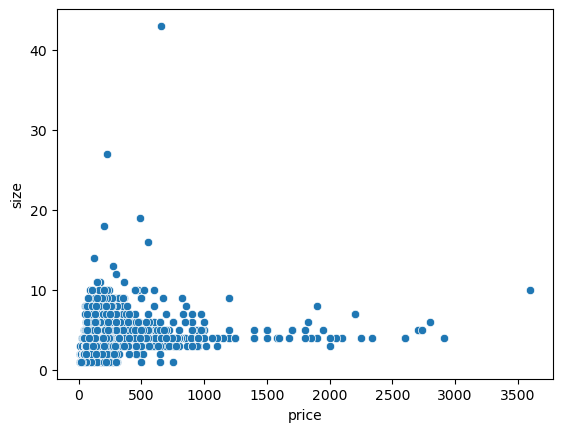

In [40]:
sns.scatterplot(y='size',x='price',data=df)

<Axes: xlabel='price', ylabel='total_sqft'>

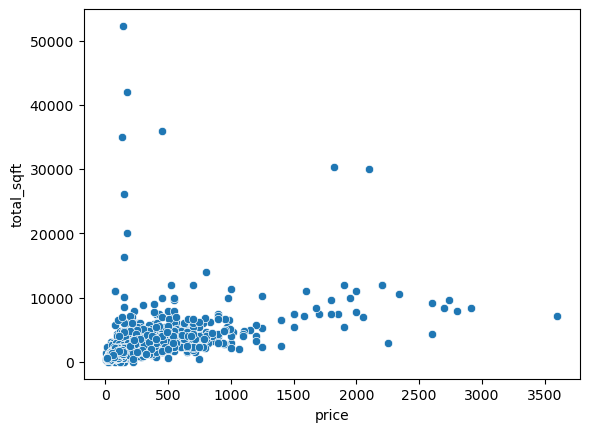

In [41]:
sns.scatterplot(y='total_sqft',x='price',data=df)

<Axes: xlabel='price', ylabel='bath'>

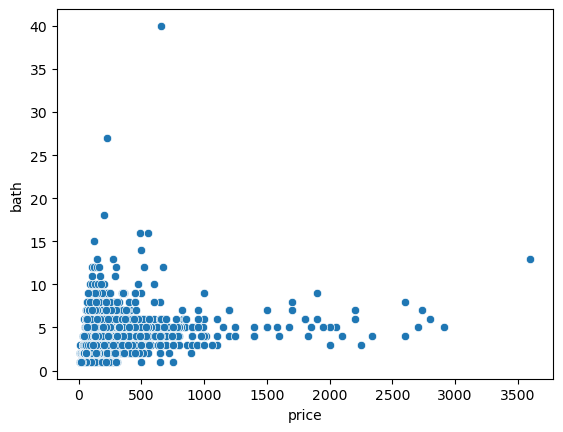

In [42]:
sns.scatterplot(y='bath',x='price',data=df)

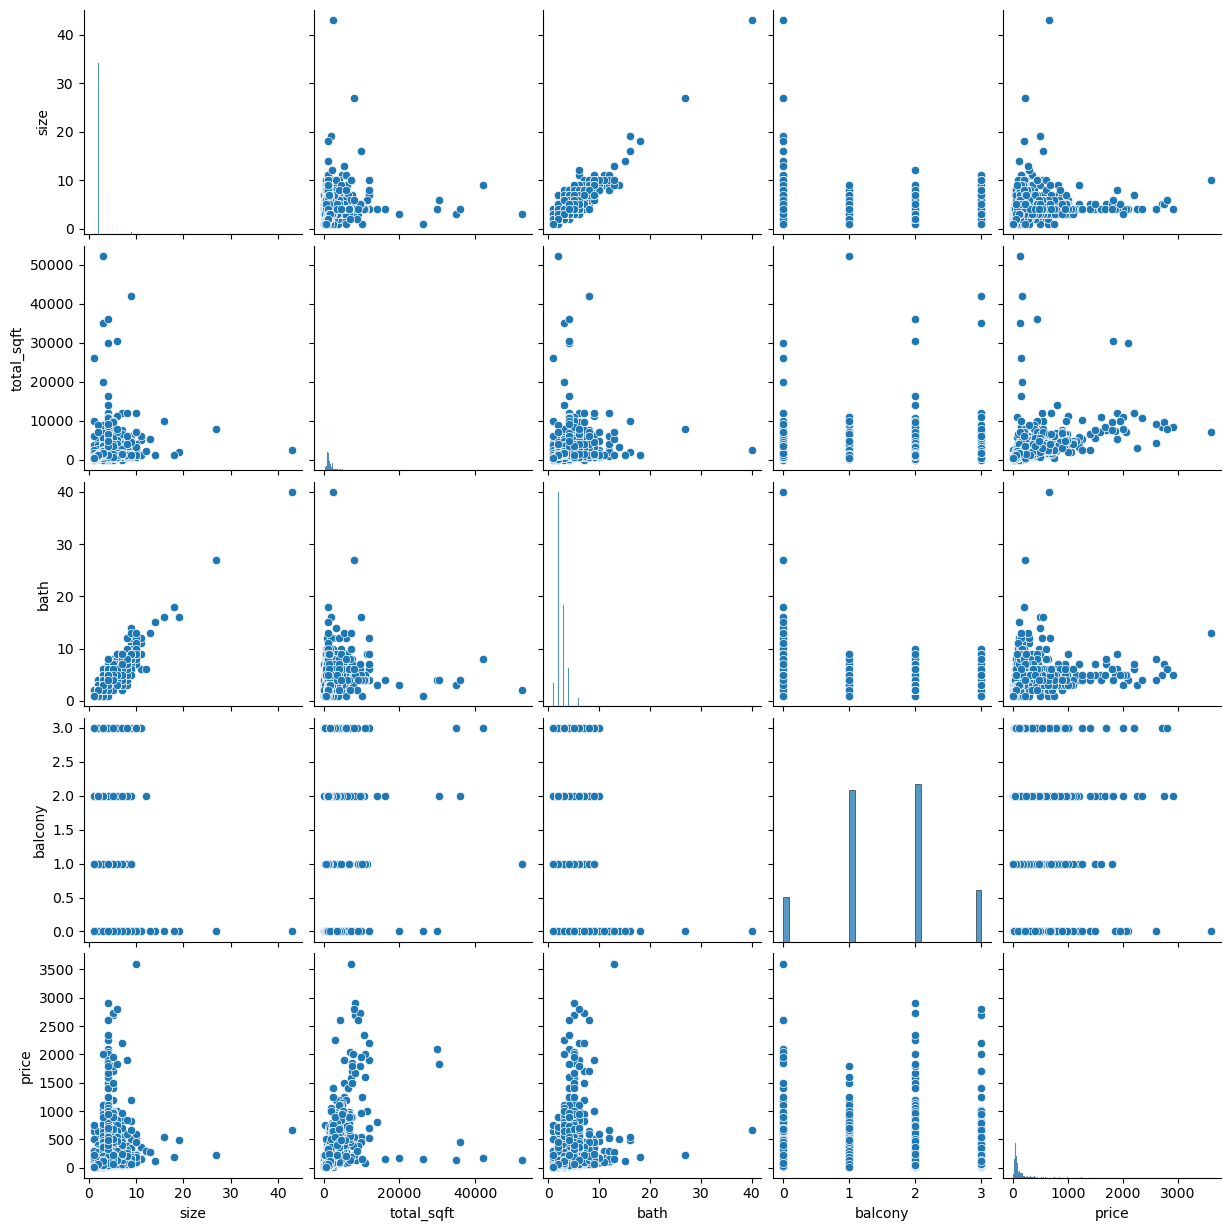

In [43]:
sns.pairplot(df)

# Model Building

In [44]:
df

,Area Type,availability,size,total_sqft,bath,balcony,price,locate
0,Super built-up Area,Dec,2.0,1056.0,2,1.0,39.07,ElectronicCity
1,Plot Area,Ready To Move,4.0,2600.0,5,3.0,120.00,Whitefield
2,Built-up Area,Ready To Move,3.0,1440.0,2,3.0,62.00,Uttarahalli
3,Super built-up Area,Ready To Move,3.0,1521.0,3,1.0,95.00,Whitefield
4,Super built-up Area,Ready To Move,2.0,1200.0,2,1.0,51.00,Whitefield
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,5.0,3453.0,4,0.0,231.00,Whitefield
13316,Super built-up Area,Ready To Move,4.0,3600.0,5,0.0,400.00,NaN
13317,Built-up Area,Ready To Move,2.0,1141.0,2,1.0,60.00,RajaRajeshwariNagar
13318,Super built-up Area,Jun,4.0,4689.0,4,1.0,488.00,NaN


In [45]:
x=df.drop('price',axis=1)
y=df['price']
# log transformation of y  \\ target
y = np.log1p(y)

In [46]:
# importing all the Regressor models and try checking the the r2score close to 1

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Load data and split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [47]:
# Define the column transformer to preprocess categorical and numerical features separately
categorical_features = ['Area Type', 'availability', 'locate']
numerical_features = ['size', 'total_sqft','total_sqft','balcony']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])

In [48]:
# Fit and transform the training data using the preprocessor
X_train_preprocessed = preprocessor.fit_transform(X_train)

In [49]:
#Ridge Regressor

model_r=Ridge(alpha=10)

model_r.fit(X_train_preprocessed, y_train)

X_test_preprocessed=preprocessor.transform(X_test)
                                        
perform_r=model_r.score(X_test_preprocessed, y_test)

perform_r

0.5572220542599637

In [50]:
#KNN
model_knn=KNeighborsRegressor(n_neighbors=3)
model_knn.fit(X_train_preprocessed, y_train)

X_test_preprocessed=preprocessor.transform(X_test)

perform_knn=model_knn.score(X_test_preprocessed, y_test)
perform_knn

0.6837295648473241

In [51]:
#DT

model_dt=step2 = DecisionTreeRegressor(max_depth=8)

model_dt.fit(X_train_preprocessed, y_train)

X_test_preprocessed=preprocessor.transform(X_test)

perform_dt=model_dt.score(X_test_preprocessed, y_test)

perform_dt

0.722202068310009

In [52]:
#Linear Regression

model_Linear=step2 = DecisionTreeRegressor(max_depth=8)

model_Linear.fit(X_train_preprocessed, y_train)

X_test_preprocessed=preprocessor.transform(X_test)

perform_Linear=model_Linear.score(X_test_preprocessed, y_test)

perform_Linear

0.7225733890399801

In [53]:
#SVR

model_SVR = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model_SVR.fit(X_train_preprocessed, y_train)

X_test_preprocessed=preprocessor.transform(X_test)
                                        
perform_SVR=model_SVR.score(X_test_preprocessed, y_test)

perform_SVR

0.7537711406900136

In [54]:
#ensemble
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train_preprocessed, y_train)

X_test_preprocessed = preprocessor.transform(X_test)

perform_rf = model_rf.score(X_test_preprocessed, y_test)

perform_rf

0.7480590444667353

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

#setting up the parameter grid
param_grid = {
    'kernel': ['rbf'],
    'C': [1.0],
    'epsilon': [0.1]
}


model_SVR = SVR()

reg = GridSearchCV(estimator=model_SVR, param_grid=param_grid, return_train_score=True)
reg.fit(X_train_preprocessed, y_train)

best_model_SVR = reg.best_estimator_

X_test_preprocessed = preprocessor.transform(X_test)

perform_SVR = best_model_SVR.score(X_test_preprocessed, y_test)

print("Performance of tuned_SVR : ", perform_SVR)


Performance of tuned_SVR :  0.7537711406900136


In [56]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(model_SVR,open('model.pkl','wb'))